# Perceptrón

Regresión logística binaria es un modelo probabilístico para clasificación en dos clases, $y\in\{0,1\}$,
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})=\operatorname{Ber}(y\mid\mu)%
\quad\text{con}\quad%
\mu=\sigma(a)%
\quad\text{y}\quad%
a=\boldsymbol{w}^t\boldsymbol{x}%
\quad\text{($b$ absorbido en $\boldsymbol{w}$)}$$
**Perceptrón** puede verse como una variante con escalón Heaviside, $H(a)=\mathbb{I}(a>0)$, en lugar de sigmoide:
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})=\operatorname{Ber}(y\mid\mu)%
\quad\text{con}\quad%
\mu=H(a)%
\quad\text{y}\quad%
a=\boldsymbol{w}^t\boldsymbol{x}%
\quad\text{($b$ absorbido en $\boldsymbol{w}$)}$$

En el caso de regresión logística, el MLE de $\boldsymbol{w}$ puede obtenerse mediante descenso por gradiente estocástico (con minibatch de talla uno):
$$\boldsymbol{w}_{t+1}=\boldsymbol{w}_t-\eta_t(\mu_n-y_n)\boldsymbol{x}_n$$
En el caso de Perceptrón, el MLE de $\boldsymbol{w}$ no puede obtenerse del mismo modo ya que la log-verosimilitud no es diferenciable. No obstante, $\boldsymbol{w}$ puede aprenderse mediante el **algoritmo Perceptrón**, iterando sobre los datos con:
$$\boldsymbol{w}_{t+1}=\boldsymbol{w}_t-\eta_t(\hat{y}_n-y_n)\boldsymbol{x}_n$$
Nótese que el algoritmo Perceptrón es prácticamente idéntico a SGD aplicado a regresión logística binaria.

**Ejemplo:** datos sintéticos 2d y modelo de sesgo nulo ($b=0$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
N, n_clusters_per_class, class_sep = 20, 2, 1.0
X, y = make_classification(n_samples=N, n_features=2, n_redundant=0, n_classes=2, 
    n_clusters_per_class=n_clusters_per_class, class_sep=class_sep) #, random_state=1)
print(np.c_[X, y])

[[ 1.42921352  1.40216373  1.        ]
 [-0.53343274 -1.20720614  0.        ]
 [-1.28955298 -1.68987396  0.        ]
 [-0.81129651  0.15449015  0.        ]
 [-2.08864582  0.37869555  1.        ]
 [ 1.28899648 -1.45092469  0.        ]
 [-1.23343394  0.81249019  1.        ]
 [ 0.71065664  2.10285935  1.        ]
 [ 1.05265208 -1.00439831  0.        ]
 [ 1.15656228 -1.11089165  0.        ]
 [-1.03817785 -1.87913803  0.        ]
 [-0.95023001  0.90895826  1.        ]
 [ 2.8537504   0.47453234  1.        ]
 [-1.32010482  0.85871803  1.        ]
 [ 0.09268322 -0.04590865  0.        ]
 [ 0.39125814  1.22104917  1.        ]
 [ 0.49027352 -0.38395735  0.        ]
 [ 1.1495338   0.88425079  1.        ]
 [-0.6651082  -0.45171466  0.        ]
 [-0.40759602  0.79371629  1.        ]]


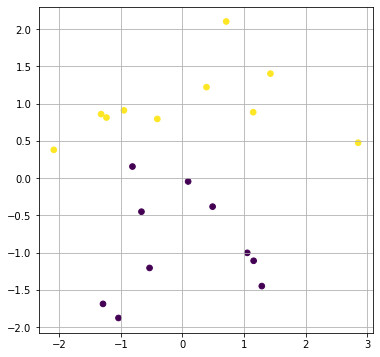

In [2]:
fig, ax = plt.subplots(figsize=(6, 6)); ax.grid(); ax.scatter(*X.T, c=y, s=32)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
XX = np.c_[np.ravel(xx), np.ravel(yy)]

In [3]:
w, eta = np.zeros((N + 1, 2)), 0.3
for n in np.arange(N):
    # mun = 1.0 / (1.0 + np.exp(- w[n, :] @ X[n, :]))
    mun = np.heaviside(w[n, :] @ X[n, :], 0.0)
    grad = mun - y[n]
    w[n+1, :] = w[n, :] - eta * (mun - y[n]) * X[n, :]
    print(n+1, mun, w[n+1])

1 0.0 [0.42876406 0.42064912]
2 0.0 [0.42876406 0.42064912]
3 0.0 [0.42876406 0.42064912]
4 0.0 [0.42876406 0.42064912]
5 0.0 [-0.19782969  0.53425778]
6 0.0 [-0.19782969  0.53425778]
7 1.0 [-0.19782969  0.53425778]
8 1.0 [-0.19782969  0.53425778]
9 0.0 [-0.19782969  0.53425778]
10 0.0 [-0.19782969  0.53425778]
11 0.0 [-0.19782969  0.53425778]
12 1.0 [-0.19782969  0.53425778]
13 0.0 [0.65829543 0.67661749]
14 0.0 [0.26226398 0.9342329 ]
15 0.0 [0.26226398 0.9342329 ]
16 1.0 [0.26226398 0.9342329 ]
17 0.0 [0.26226398 0.9342329 ]
18 1.0 [0.26226398 0.9342329 ]
19 0.0 [0.26226398 0.9342329 ]
20 1.0 [0.26226398 0.9342329 ]


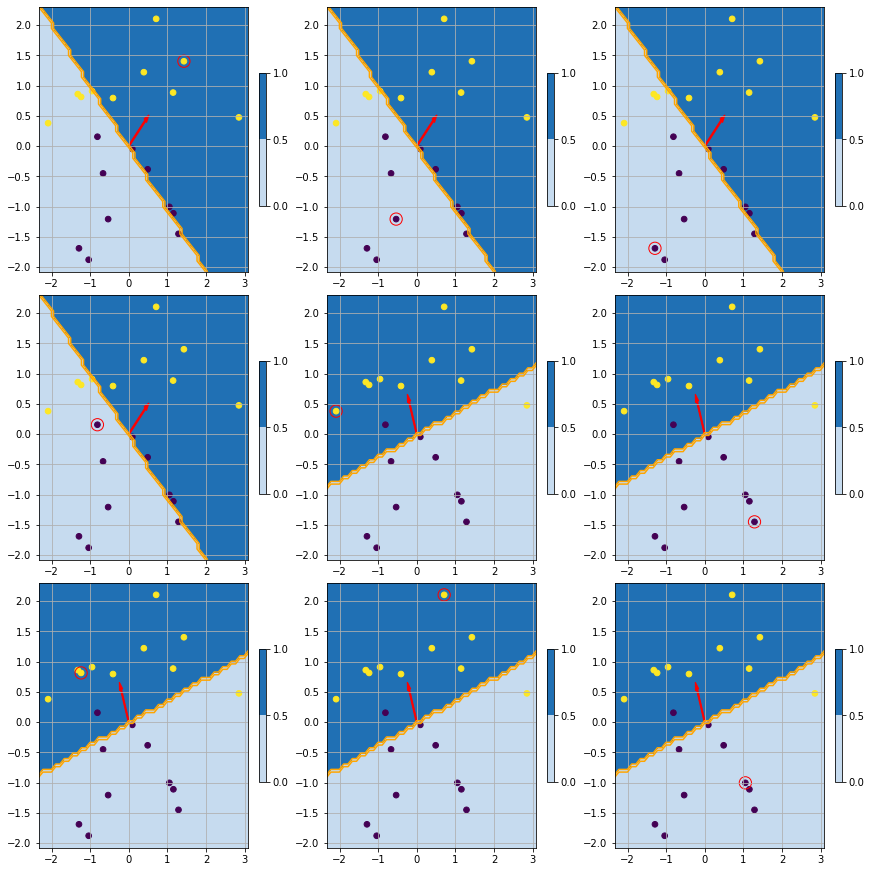

In [4]:
nrows = ncols = int(min(3, np.ceil(np.sqrt(N))));
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12), constrained_layout=True)
for n in np.arange(min(N, nrows * ncols)):
    ax = axes.flat[n]; ax.axis('off'); ax = fig.add_subplot(nrows, ncols, n + 1); ax.grid()
    z = lambda x: w[n + 1, :] @ x
    zz = np.heaviside(np.apply_along_axis(z, 1, XX), 0.0)
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 1, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5)
    ax.arrow(0, 0, w[n+1, 0], w[n+1, 1], width=.03, facecolor='red', edgecolor='red')
    ax.scatter(*X.T, c=y, s=32); ax.scatter(X[n, 0], X[n, 1], facecolors='none', edgecolors='red', s=150)